# Clustering & PCA Assignment

**Overview**<br>
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities
Country-data is the data-set containing socio-economic factors of countries for helping  to choose the countries that are in the direst need of aid. 


We will be using the online reatil trasnational dataset to build a RFM clustering and choose the best set of customers.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Reading the Data Set

In [2]:
#Reading Dataset
country_data = pd.read_csv("Country-data.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)

### Data quality check and cleaning

In [3]:
# Let's look top 5 rows
country_data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [4]:
#Sanity Check
country_data.shape
country_data.describe()
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
#Na Handling
country_data.isnull().values.any()
country_data.isnull().values.sum()
country_data.isnull().sum()*100/country_data.shape[0]

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [6]:
#Converting import,export and health into absolute forms by multiplying with gdpp
country_data.exports = (country_data.exports * country_data.gdpp)/100
country_data.imports = (country_data.imports * country_data.gdpp)/100
country_data.health = (country_data.health * country_data.gdpp)/100

In [7]:
#Country data after changes
country_data.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

### PCA on the data

In [8]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [9]:
#Dropping non-PCA related columns
country_numeric = country_data.drop('country',axis=1)
country_numeric.head()
normalized_country_numeric=(country_numeric-country_numeric.mean())/country_numeric.std()
normalized_country_numeric.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.287660 -0.409779 -0.563346 -0.430979 -0.805822   0.156864   -1.614237   
1   -0.537333 -0.349141 -0.437901 -0.312737 -0.374243  -0.311411    0.645924   
2   -0.272015 -0.317571 -0.483372 -0.352660 -0.220182   0.786908    0.668413   
3    2.001787 -0.290501 -0.530767 -0.344915 -0.583289   1.382894   -1.175698   
4   -0.693548 -0.104019 -0.178234  0.040613  0.101427  -0.599944    0.702147   

   total_fer      gdpp  
0   1.897176 -0.677143  
1  -0.857394 -0.484167  
2  -0.038289 -0.463980  
3   2.121770 -0.514720  
4  -0.540321 -0.041692

In [10]:
#Doing the PCA on the data
pca.fit_transform(normalized_country_numeric)

array([[-2.62767220e+00,  1.46785278e+00, -5.47841222e-01, ...,
        -4.00900953e-01,  1.51790265e-02,  2.13882965e-02],
       [-2.41329837e-02, -1.42560433e+00, -1.40809421e-02, ...,
         2.61961803e-01,  3.74719568e-04, -3.37815738e-02],
       [-4.58179412e-01, -6.73469898e-01,  9.56478048e-01, ...,
         2.26000797e-01,  4.15791405e-02, -3.25657334e-02],
       ...,
       [-5.92666688e-01, -1.07310727e+00,  5.27289084e-01, ...,
         1.27293690e-01, -3.74307601e-02, -7.36386149e-02],
       [-1.79696793e+00,  5.86964092e-01,  1.17731020e+00, ...,
        -1.30456795e-01,  1.19345792e-02, -6.61317380e-03],
       [-2.63657522e+00,  1.56723995e+00, -1.74161203e-01, ...,
        -7.48910516e-01,  5.92599826e-03,  3.53003525e-02]])

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [11]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [12]:
colnames = list(normalized_country_numeric.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

PC1       PC2     Feature
0 -0.316392  0.476267  child_mort
1  0.342887  0.397311     exports
2  0.358535  0.155053      health
3  0.344865  0.370781     imports
4  0.380041  0.128384      income
5 -0.143085  0.221261   inflation
6  0.343857 -0.369820  life_expec
7 -0.302842  0.459715   total_fer
8  0.399988  0.200624        gdpp

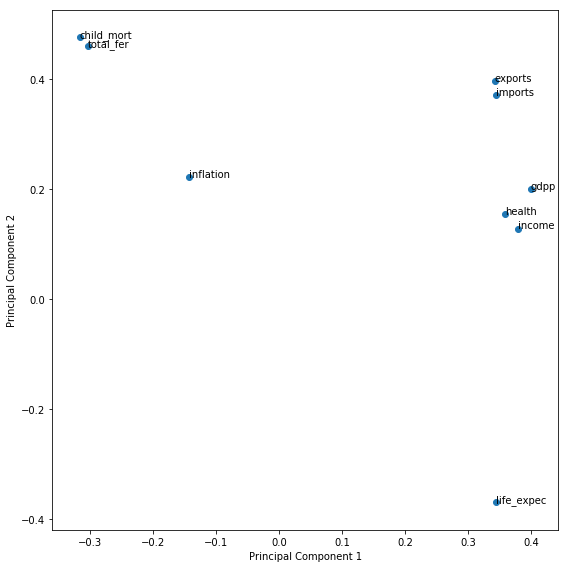

In [13]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

#### Looking at the screeplot to assess the number of needed principal components

In [14]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

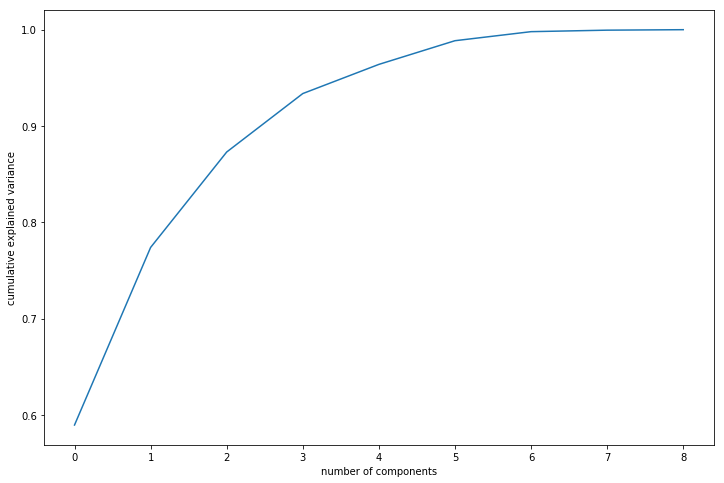

In [15]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 4 components are enough to describe 95% of the variance in the dataset
- We'll choose 4 components for our modeling

In [16]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

#### Basis transformation - getting the data onto our PCs

In [17]:
df_country_pca = pca_final.fit_transform(normalized_country_numeric)
df_country_pca.shape

(167, 4)

In [18]:
principalDf = pd.DataFrame(data = df_country_pca, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])
principalDf.head()

principal component 1  principal component 2  principal component 3  \
0              -2.628741               1.467671              -0.544861   
1              -0.023774              -1.431511              -0.009052   
2              -0.457883              -0.676759               0.964950   
3              -2.715414               2.169493               0.596001   
4               0.646832              -1.023420              -0.243438   

   principal component 4  
0               0.236556  
1              -0.441593  
2              -0.175860  
3               0.437603  
4              -0.266711

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [19]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(principalDf.transpose())

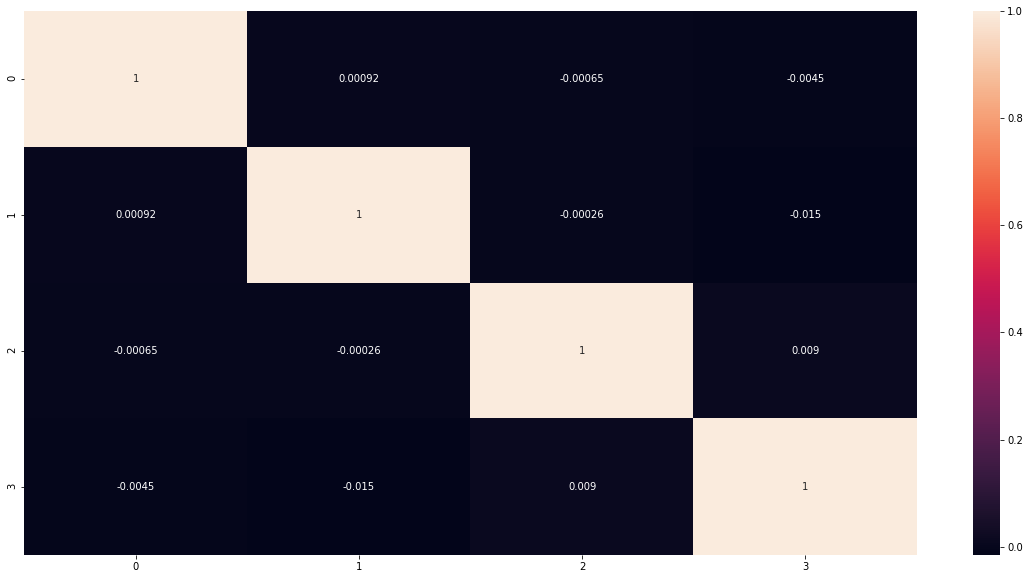

In [20]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [21]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.008959421276882101 , min corr:  -0.015302266510758228


In [22]:
#Adding Non PCA column back
c=country_data['country']
df_pca = pd.concat([principalDf,c], axis = 1)

#Creating copy of PCA with outliers for later use
df_pca_copy= df_pca

### Outlier Treatment

In [23]:
df_pca.describe(percentiles=[.25,.5,.75,.90,.95,.99])

principal component 1  principal component 2  principal component 3  \
count           1.670000e+02           1.670000e+02           1.670000e+02   
mean            2.659217e-18          -1.728491e-17           3.324021e-19   
std             2.303115e+00           1.288344e+00           9.439885e-01   
min            -3.926375e+00          -1.695560e+00          -1.793469e+00   
25%            -1.443424e+00          -9.779060e-01          -4.001648e-01   
50%            -3.558551e-01          -3.951506e-01          -1.781488e-01   
75%             8.475524e-01           6.764098e-01           2.656764e-01   
90%             2.968830e+00           1.584395e+00           9.556545e-01   
95%             3.906464e+00           2.168513e+00           1.184874e+00   
99%             6.354997e+00           3.300460e+00           3.064677e+00   
max             1.259575e+01           8.195153e+00           7.844306e+00   

       principal component 4  
count           1.670000e+02  
mean            8.310053e-18  
std             7.385737e-01  
min            -4.573490e+00  
25%            -3.423624e-01  
50%            -1.352047e-01  
75%             2.231025e-01  
90%             7.595235e-01  
95%             1.143431e+00  
99%             2.013466e+00  
max             3.186073e+00

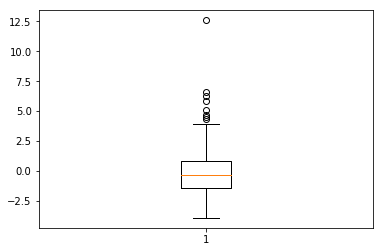

In [24]:
# outlier treatment for principal component 1
plt.boxplot(df_pca['principal component 1'])
Q1 = df_pca['principal component 1'].quantile(0.25)
Q3 = df_pca['principal component 1'].quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca['principal component 1'] >= Q1 - 1.5*IQR) & (df_pca['principal component 1'] <= Q3 + 1.5*IQR)]

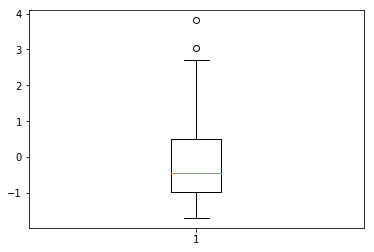

In [25]:
# outlier treatment for principal component 2
plt.boxplot(df_pca['principal component 2'])
Q1 = df_pca['principal component 2'].quantile(0.25)
Q3 = df_pca['principal component 2'].quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca['principal component 2'] >= Q1 - 1.5*IQR) & (df_pca['principal component 2'] <= Q3 + 1.5*IQR)]

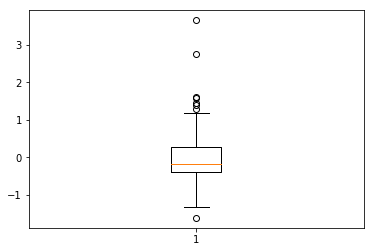

In [26]:
# outlier treatment for principal component 3
plt.boxplot(df_pca['principal component 3'])
Q1 = df_pca['principal component 3'].quantile(0.25)
Q3 = df_pca['principal component 3'].quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca['principal component 3'] >= Q1 - 1.5*IQR) & (df_pca['principal component 3'] <= Q3 + 1.5*IQR)]

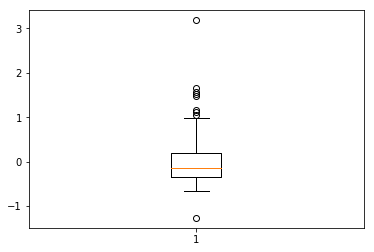

In [27]:
# outlier treatment for principal component 4
plt.boxplot(df_pca['principal component 4'])
Q1 = df_pca['principal component 4'].quantile(0.25)
Q3 = df_pca['principal component 4'].quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca['principal component 4'] >= Q1 - 1.5*IQR) & (df_pca['principal component 4'] <= Q3 + 1.5*IQR)]

In [28]:
#Checking df shape after outlier removal
df_pca.shape

#27 rows removed i.e ~16% data removed i.e we are good here!

(140, 5)

# Scatter plot of PC

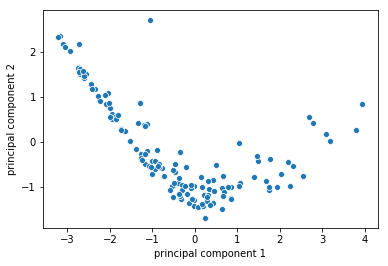

In [29]:
sns.scatterplot(df_pca['principal component 1'],df_pca['principal component 2'])

## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

Some usefull links to understand Hopkins Statistics:
- [WikiPedia](https://en.wikipedia.org/wiki/Hopkins_statistic)
- [Article](http://www.sthda.com/english/articles/29-cluster-validation-essentials/95-assessing-clustering-tendency-essentials/)

In [30]:
#Adding back original columns along with PCs without outliers
df_pca_modified = country_data.merge(df_pca, on = "country")
df_pca_modified.shape

(140, 14)

In [31]:
df_pca_modified.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  principal component 1  \
0       9.44        56.2       5.82    553              -2.628741   
1       4.49        76.3       1.65   4090              -0.023774   
2      16.10        76.5       2.89   4460              -0.457883   
3      22.40        60.1       6.16   3530              -2.715414   
4       1.44        76.8       2.13  12200               0.646832   

   principal component 2  principal component 3  principal component 4  
0               1.467671              -0.544861               0.236556  
1              -1.431511              -0.009052              -0.441593  
2              -0.676759               0.964950              -0.175860  
3               2.169493               0.596001               0.437603  
4              -1.023420              -0.243438              -0.266711

In [32]:
#Adding back original columns along with PCs with outliers
df_pca_copy = country_data.merge(df_pca_copy, on = "country")
df_pca_copy.shape

(167, 14)

In [33]:
df_pca_copy.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  principal component 1  \
0       9.44        56.2       5.82    553              -2.628741   
1       4.49        76.3       1.65   4090              -0.023774   
2      16.10        76.5       2.89   4460              -0.457883   
3      22.40        60.1       6.16   3530              -2.715414   
4       1.44        76.8       2.13  12200               0.646832   

   principal component 2  principal component 3  principal component 4  
0               1.467671              -0.544861               0.236556  
1              -1.431511              -0.009052              -0.441593  
2              -0.676759               0.964950              -0.175860  
3               2.169493               0.596001               0.437603  
4              -1.023420              -0.243438              -0.266711

In [34]:
#Storing list of all the 167 countries
country=df_pca_modified['country']

#Dropping country column for clustering (i.e non numeric variable) for df without outlier
df_pca_modified=df_pca_modified.drop('country',axis=1)

#Dropping country column for clustering (i.e non numeric variable) for df with outlier
df_pca_copy=df_pca_copy.drop('country',axis=1)

In [35]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [36]:
#Hopkins test for df with outlier
hopkins(df_pca_copy)
#Thus clusterring can be perfomed

0.9681532344163448

In [37]:
#Hopkins test for df without outlier
hopkins(df_pca_modified)
#Thus clusterring can be perfomed

0.8745340759536043

## Choosing Clusters for K-Means

## Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [38]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_pca_modified)
    sse_.append([k, silhouette_score(df_pca_modified, kmeans.labels_)])

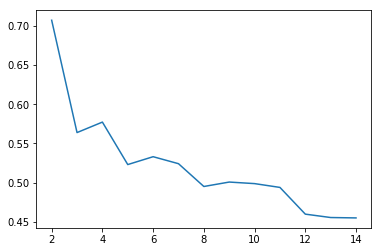

In [39]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [40]:
#More the silhoutte score the better.. so from above we can choose 4 or 5 clusters (2 is the best but won't give much details)

## Sum of Squared Distances

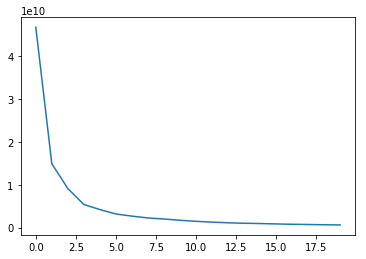

In [41]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50,random_state=0)
    model_clus.fit(df_pca_modified)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [42]:
#Again from SSD we can conclude that 4 or 5 clusters will be suitable ( i.e the elbow is at 4 or 5)

# Kmeans with K=5

In [43]:
model_clus5 = KMeans(n_clusters = 5, max_iter=50,random_state=0)
model_clus5.fit(df_pca_modified)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [44]:
# analysis of clusters formed
df_pca_modified.index = pd.RangeIndex(len(df_pca_modified.index))

#Getting df with clusters
df_km = pd.concat([df_pca_modified, pd.Series(model_clus5.labels_)], axis=1)
df_km.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','pc1', 'pc2', 'pc3', 'pc4', 'ClusterID']
df_km.head()
df_km.shape

(140, 14)

In [45]:
#Calculating mean for each variable for analysis
km_clusters_child_mort = pd.DataFrame(df_km.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(df_km.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(df_km.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(df_km.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(df_km.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(df_km.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(df_km.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(df_km.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(df_km.groupby(["ClusterID"]).gdpp.mean())

In [46]:
#Forming df with mean values and clusterID
df_km_mean = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_child_mort, km_clusters_exports,km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df_km_mean.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df_km_mean.head()

ClusterID  child_mort_mean  exports_mean  health_mean  imports_mean  \
0          0        23.454054   2428.793514   409.721351   2644.398378   
1          1         5.633333  25184.966667  3379.475000  20828.416667   
2          2        10.364706   6676.992353   812.176235   6508.172353   
3          3        66.718182    528.304599    88.976956    747.658759   
4          4        13.271429  11176.800000  2071.132143  10716.478571   

    income_mean  inflation_mean  life_expec_mean  total_fer_mean     gdpp_mean  
0  12324.864865        6.379135        72.624324        2.290811   6042.432432  
1  49283.333333        5.379000        79.533333        1.908333  42150.000000  
2  20864.705882        4.835588        74.923529        1.831765  12302.352941  
3   3413.409091        8.508879        64.000000        4.113939   1501.606061  
4  32200.000000        4.113929        77.850000        2.054286  25814.285714

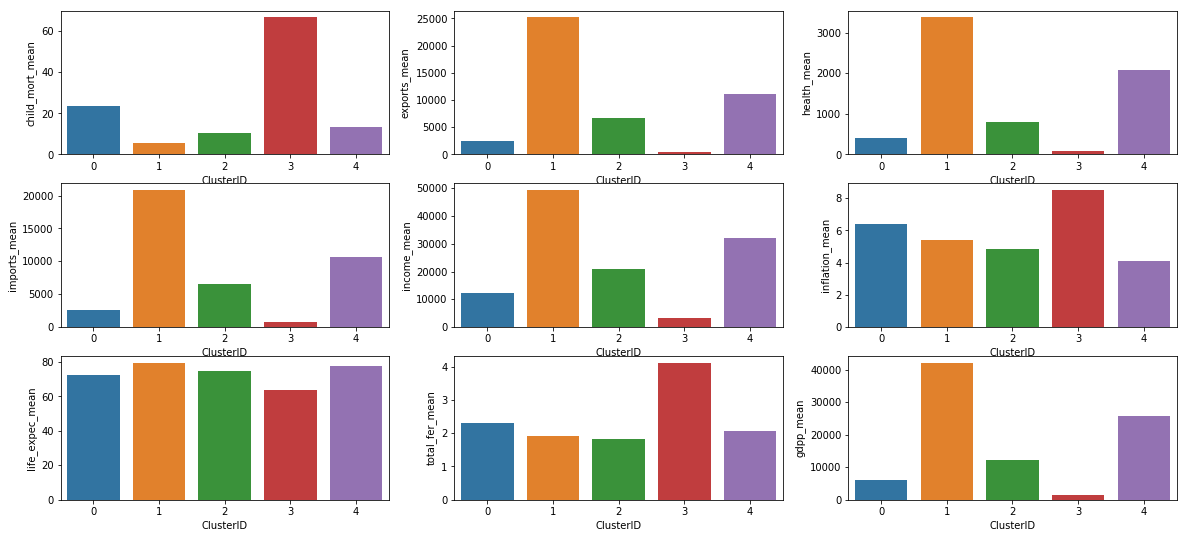

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 9))
plt.subplot(3,3,1)
sns.barplot(x=df_km_mean.ClusterID, y=df_km_mean.child_mort_mean)

plt.subplot(3,3,2)
sns.barplot(x=df_km_mean.ClusterID, y=df_km_mean.exports_mean)

plt.subplot(3,3,3)
sns.barplot(x=df_km_mean.ClusterID, y=df_km_mean.health_mean)

plt.subplot(3,3,4)
sns.barplot(x=df_km_mean.ClusterID, y=df_km_mean.imports_mean)

plt.subplot(3,3,5)
sns.barplot(x=df_km_mean.ClusterID, y=df_km_mean.income_mean)

plt.subplot(3,3,6)
sns.barplot(x=df_km_mean.ClusterID, y=df_km_mean.inflation_mean)

plt.subplot(3,3,7)
sns.barplot(x=df_km_mean.ClusterID, y=df_km_mean.life_expec_mean)

plt.subplot(3,3,8)
sns.barplot(x=df_km_mean.ClusterID, y=df_km_mean.total_fer_mean)

plt.subplot(3,3,9)
sns.barplot(x=df_km_mean.ClusterID, y=df_km_mean.gdpp_mean)

plt.show()

In [48]:
#From above we can see cluster 3 really needs the aid since it's lagging in all the positive socio economic factors

In [49]:
#Adding back country 
final_k5 = pd.concat([country,df_km], axis = 1)
final_k5.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp       pc1       pc2       pc3  \
0       9.44        56.2       5.82    553 -2.628741  1.467671 -0.544861   
1       4.49        76.3       1.65   4090 -0.023774 -1.431511 -0.009052   
2      16.10        76.5       2.89   4460 -0.457883 -0.676759  0.964950   
3      22.40        60.1       6.16   3530 -2.715414  2.169493  0.596001   
4       1.44        76.8       2.13  12200  0.646832 -1.023420 -0.243438   

        pc4  ClusterID  
0  0.236556          3  
1 -0.441593          0  
2 -0.175860          0  
3  0.437603          3  
4 -0.266711          2

In [50]:
#Choosing the cluster and getting count of final countries in that cluster
final=final_k5[final_k5['ClusterID'] == 3]['country'].count()
final

66

In [51]:
final_k5[final_k5['ClusterID'] == 3]['country'].head(10)

0      Afghanistan
3           Angola
5          Armenia
10      Bangladesh
15           Benin
16          Bhutan
17         Bolivia
22    Burkina Faso
23         Burundi
24        Cambodia
Name: country, dtype: object

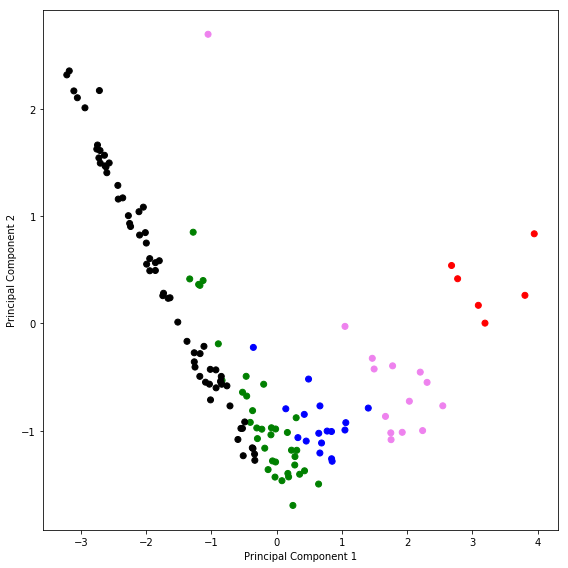

In [52]:
#PC scatterplot for different clusters

%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(final_k5['pc1'], final_k5['pc2'], c = final_k5['ClusterID'].map({0:'green',1:'red',2:'blue',3:'black',4: 'violet'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [53]:
df_pca_copy.head()

child_mort  exports    health   imports  income  inflation  life_expec  \
0        90.2    55.30   41.9174   248.297    1610       9.44        56.2   
1        16.6  1145.20  267.8950  1987.740    9930       4.49        76.3   
2        27.3  1712.64  185.9820  1400.440   12900      16.10        76.5   
3       119.0  2199.19  100.6050  1514.370    5900      22.40        60.1   
4        10.3  5551.00  735.6600  7185.800   19100       1.44        76.8   

   total_fer   gdpp  principal component 1  principal component 2  \
0       5.82    553              -2.628741               1.467671   
1       1.65   4090              -0.023774              -1.431511   
2       2.89   4460              -0.457883              -0.676759   
3       6.16   3530              -2.715414               2.169493   
4       2.13  12200               0.646832              -1.023420   

   principal component 3  principal component 4  
0              -0.544861               0.236556  
1              -0.009052              -0.441593  
2               0.964950              -0.175860  
3               0.596001               0.437603  
4              -0.243438              -0.266711

In [54]:
#Predicting clusters with outliers
cid=pd.DataFrame({"cid": model_clus5.predict(df_pca_copy)})
df_pca_copy['cid']=cid

In [55]:
df_pca_copy[df_pca_copy['cid'] == 3].shape

(72, 14)

#### Adding back outliers is not useful here, so we'll discard them

## K-Means with K = 4

In [56]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=50,random_state=0)
model_clus4.fit(df_pca_modified)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [57]:
# analysis of clusters formed
df_pca_modified.index = pd.RangeIndex(len(df_pca_modified.index))

#Getting df with clusters
df_km = pd.concat([df_pca_modified, pd.Series(model_clus4.labels_)], axis=1)
df_km.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','pc1', 'pc2', 'pc3', 'pc4', 'ClusterID']
df_km.head()
df_km.shape

(140, 14)

In [58]:
#Calculating mean for each variable for analysis
km_clusters_child_mort = pd.DataFrame(df_km.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(df_km.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(df_km.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(df_km.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(df_km.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(df_km.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(df_km.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(df_km.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(df_km.groupby(["ClusterID"]).gdpp.mean())

In [59]:
#Forming df with mean values and clusterID
df_km_mean = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort, km_clusters_exports,km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df_km_mean.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df_km_mean.head()

ClusterID  child_mort_mean  exports_mean  health_mean  imports_mean  \
0          0        12.853333  11276.066667  2030.332667  10863.033333   
1          1        58.470732    747.223701   128.236782   1000.229977   
2          2         5.633333  25184.966667  3379.475000  20828.416667   
3          3        17.454054   4440.653784   617.962405   4402.526757   

    income_mean  inflation_mean  life_expec_mean  total_fer_mean     gdpp_mean  
0  31733.333333        3.872000        77.693333        2.012667  25200.000000  
1   4647.621951        7.835927        65.837805        3.777073   2116.902439  
2  49283.333333        5.379000        79.533333        1.908333  42150.000000  
3  17018.918919        6.399676        73.259459        2.061351   9233.243243

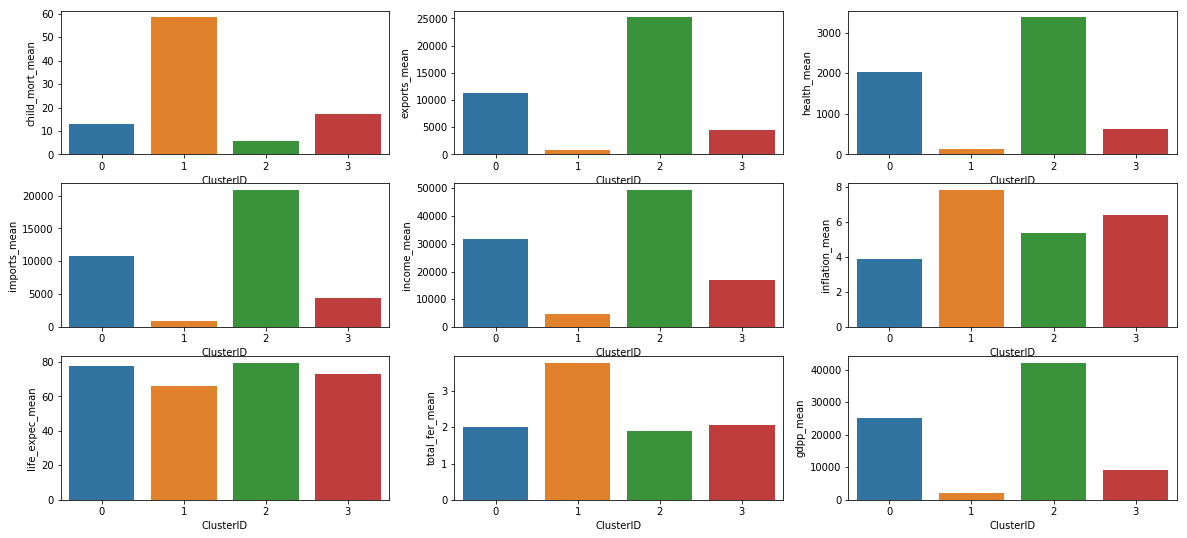

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 9))
plt.subplot(3,3,1)
sns.barplot(x=df_km_mean.ClusterID, y=df_km_mean.child_mort_mean)

plt.subplot(3,3,2)
sns.barplot(x=df_km_mean.ClusterID, y=df_km_mean.exports_mean)

plt.subplot(3,3,3)
sns.barplot(x=df_km_mean.ClusterID, y=df_km_mean.health_mean)

plt.subplot(3,3,4)
sns.barplot(x=df_km_mean.ClusterID, y=df_km_mean.imports_mean)

plt.subplot(3,3,5)
sns.barplot(x=df_km_mean.ClusterID, y=df_km_mean.income_mean)

plt.subplot(3,3,6)
sns.barplot(x=df_km_mean.ClusterID, y=df_km_mean.inflation_mean)

plt.subplot(3,3,7)
sns.barplot(x=df_km_mean.ClusterID, y=df_km_mean.life_expec_mean)

plt.subplot(3,3,8)
sns.barplot(x=df_km_mean.ClusterID, y=df_km_mean.total_fer_mean)

plt.subplot(3,3,9)
sns.barplot(x=df_km_mean.ClusterID, y=df_km_mean.gdpp_mean)

plt.show()

In [61]:
#From above we can see cluster 1 really needs the aid since it's lagging in all the positive socio economic factors

In [62]:
#Adding back country
final_k4 = pd.concat([country,df_km], axis = 1)
final_k4.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp       pc1       pc2       pc3  \
0       9.44        56.2       5.82    553 -2.628741  1.467671 -0.544861   
1       4.49        76.3       1.65   4090 -0.023774 -1.431511 -0.009052   
2      16.10        76.5       2.89   4460 -0.457883 -0.676759  0.964950   
3      22.40        60.1       6.16   3530 -2.715414  2.169493  0.596001   
4       1.44        76.8       2.13  12200  0.646832 -1.023420 -0.243438   

        pc4  ClusterID  
0  0.236556          1  
1 -0.441593          1  
2 -0.175860          3  
3  0.437603          1  
4 -0.266711          3

In [63]:
#Choosing the cluster and getting count of final countries in that cluster
final=final_k4[final_k4['ClusterID'] == 1]['country']
final.count()

82

In [64]:
final_k4[final_k4['ClusterID'] == 1]['country'].head(10)

0                Afghanistan
1                    Albania
3                     Angola
5                    Armenia
10                Bangladesh
14                    Belize
15                     Benin
16                    Bhutan
17                   Bolivia
18    Bosnia and Herzegovina
Name: country, dtype: object

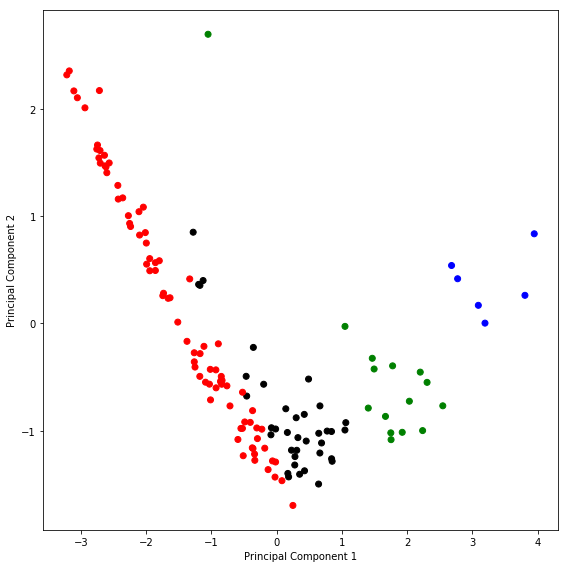

In [65]:
#PC scatterplot for different clusters

%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(final_k4['pc1'], final_k4['pc2'], c = final_k4['ClusterID'].map({0:'green',1:'red',2:'blue',3:'black'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [66]:
df_pca_copy.head()
df_pca_copy=df_pca_copy.drop('cid',axis=1)

In [67]:
#Predicting clusters with outliers
cid=pd.DataFrame({"cid": model_clus4.predict(df_pca_copy)})
df_pca_copy['cid']=cid
#df_pca_copy['country']=country_data.country

In [68]:
df_pca_copy[df_pca_copy['cid'] == 1].shape

(88, 14)

#### Adding back outliers is not useful here, so we'll discard them

<hr>

## Heirarchical Clustering

In [69]:
#Dropping country
df_pca = df_pca.drop('country',axis=1)

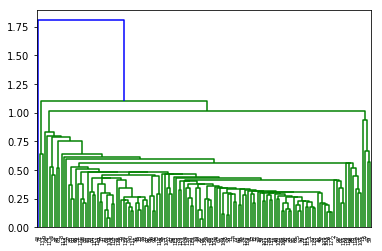

In [70]:
# heirarchical clustering
mergings = linkage(df_pca, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

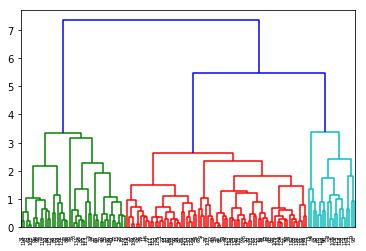

In [71]:
mergings = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

# Hierarchial Clustering with n = 5

In [72]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
df_hc = pd.concat([df_pca, clusterCut], axis=1)
df_hc.columns = ['pc1', 'pc2', 'pc3', 'pc4', 'ClusterID']
df_hc.head()

pc1       pc2       pc3       pc4  ClusterID
0 -2.628741  1.467671 -0.544861  0.236556        0.0
1 -0.023774 -1.431511 -0.009052 -0.441593        1.0
2 -0.457883 -0.676759  0.964950 -0.175860        1.0
3 -2.715414  2.169493  0.596001  0.437603        0.0
4  0.646832 -1.023420 -0.243438 -0.266711        1.0

In [73]:
df_hc = pd.concat([df_hc,country], axis = 1)
df_hc=country_data.merge(df_hc, on = "country")

In [74]:
df_hc.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','pc1', 'pc2', 'pc3', 'pc4', 'ClusterID']
df_hc.shape

(140, 15)

In [75]:
df_hc.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp       pc1       pc2       pc3  \
0       9.44        56.2       5.82    553 -2.628741  1.467671 -0.544861   
1       4.49        76.3       1.65   4090 -0.023774 -1.431511 -0.009052   
2      16.10        76.5       2.89   4460 -0.457883 -0.676759  0.964950   
3      22.40        60.1       6.16   3530 -2.715414  2.169493  0.596001   
4       1.44        76.8       2.13  12200  0.646832 -1.023420 -0.243438   

        pc4  ClusterID  
0  0.236556        0.0  
1 -0.441593        1.0  
2 -0.175860        1.0  
3  0.437603        0.0  
4 -0.266711        1.0

In [76]:
#summarise
hc_clusters_child_mort = pd.DataFrame(df_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_exports = pd.DataFrame(df_hc.groupby(["ClusterID"]).exports.mean())
hc_clusters_health = pd.DataFrame(df_hc.groupby(["ClusterID"]).health.mean())
hc_clusters_imports = pd.DataFrame(df_hc.groupby(["ClusterID"]).imports.mean())
hc_clusters_income = pd.DataFrame(df_hc.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = pd.DataFrame(df_hc.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec = pd.DataFrame(df_hc.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_total_fer = pd.DataFrame(df_hc.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_gdpp = pd.DataFrame(df_hc.groupby(["ClusterID"]).gdpp.mean())

In [77]:
df_hc_mean = pd.concat([pd.Series([0,1,2,3,4]), hc_clusters_child_mort, hc_clusters_exports,hc_clusters_health,hc_clusters_imports,hc_clusters_income,hc_clusters_inflation,hc_clusters_life_expec,hc_clusters_total_fer,hc_clusters_gdpp], axis=1)
df_hc_mean.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df_hc_mean.head()

ClusterID  child_mort_mean  exports_mean  health_mean  imports_mean  \
0          0       106.495833    877.499717    77.487958    751.170250   
1          1        22.417105   2616.788007   383.481663   2858.415672   
2          2         3.600000  24558.825000  4495.825000  22751.625000   
3          3         6.325000  12958.981250  1998.903750  11677.350000   
4          4        64.590000   1015.622590   157.089385    985.828550   

    income_mean  inflation_mean  life_expec_mean  total_fer_mean     gdpp_mean  
0   3100.208333        9.296042        57.345833        5.607083   1472.500000  
1  11405.526316        6.190250        72.867105        2.265658   5890.947368  
2  40725.000000        2.143500        80.625000        1.842500  44850.000000  
3  35943.750000        3.555000        78.700000        1.816250  27150.000000  
4   5164.000000       10.533500        62.800000        4.222000   2463.200000

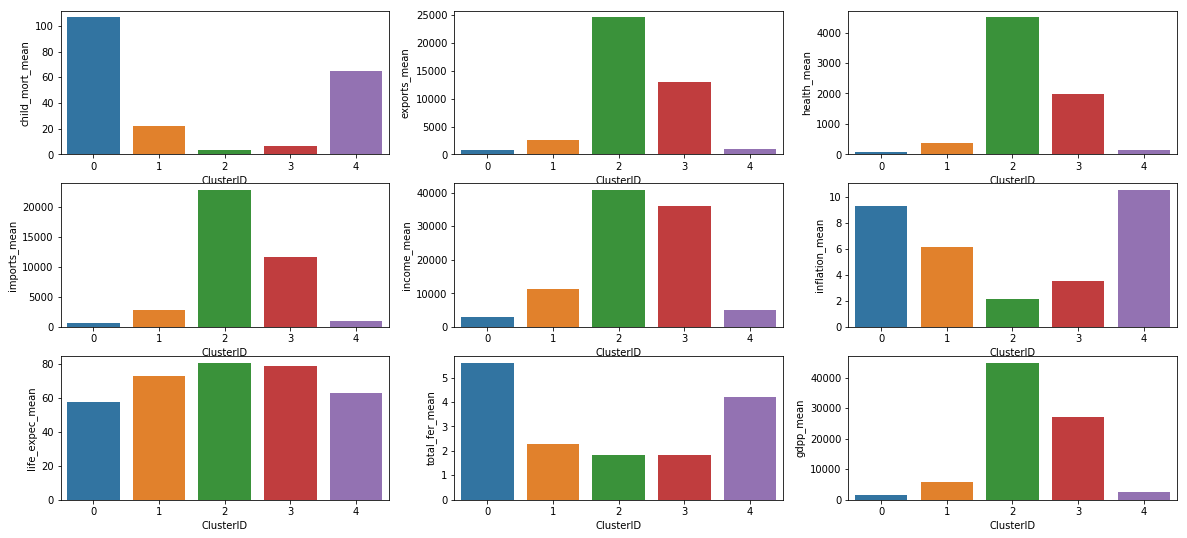

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 9))
plt.subplot(3,3,1)
sns.barplot(x=df_hc_mean.ClusterID, y=df_hc_mean.child_mort_mean)

plt.subplot(3,3,2)
sns.barplot(x=df_hc_mean.ClusterID, y=df_hc_mean.exports_mean)

plt.subplot(3,3,3)
sns.barplot(x=df_hc_mean.ClusterID, y=df_hc_mean.health_mean)

plt.subplot(3,3,4)
sns.barplot(x=df_hc_mean.ClusterID, y=df_hc_mean.imports_mean)

plt.subplot(3,3,5)
sns.barplot(x=df_hc_mean.ClusterID, y=df_hc_mean.income_mean)

plt.subplot(3,3,6)
sns.barplot(x=df_hc_mean.ClusterID, y=df_hc_mean.inflation_mean)

plt.subplot(3,3,7)
sns.barplot(x=df_hc_mean.ClusterID, y=df_hc_mean.life_expec_mean)

plt.subplot(3,3,8)
sns.barplot(x=df_hc_mean.ClusterID, y=df_hc_mean.total_fer_mean)

plt.subplot(3,3,9)
sns.barplot(x=df_hc_mean.ClusterID, y=df_hc_mean.gdpp_mean)

plt.show()

In [79]:
final=df_hc[df_hc['ClusterID'] == 0]['country'].count()
final

24

In [80]:
df_hc[df_hc['ClusterID'] == 0]['country'].head(10)

0           Afghanistan
3                Angola
15                Benin
22         Burkina Faso
23              Burundi
25             Cameroon
27                 Chad
32     Congo, Dem. Rep.
35        Cote d'Ivoire
43    Equatorial Guinea
Name: country, dtype: object

# Hierarchial Clustering with n = 4

In [81]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
df_hc = pd.concat([df_pca, clusterCut], axis=1)
df_hc.columns = ['pc1', 'pc2', 'pc3', 'pc4', 'ClusterID']
df_hc.head()

pc1       pc2       pc3       pc4  ClusterID
0 -2.628741  1.467671 -0.544861  0.236556        0.0
1 -0.023774 -1.431511 -0.009052 -0.441593        1.0
2 -0.457883 -0.676759  0.964950 -0.175860        1.0
3 -2.715414  2.169493  0.596001  0.437603        0.0
4  0.646832 -1.023420 -0.243438 -0.266711        1.0

In [82]:
df_hc = pd.concat([df_hc,c], axis = 1)
df_hc=country_data.merge(df_hc, on = "country")

In [83]:
df_hc.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','pc1', 'pc2', 'pc3', 'pc4', 'ClusterID']
df_hc.shape

(167, 15)

In [84]:
df_hc.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp       pc1       pc2       pc3  \
0       9.44        56.2       5.82    553 -2.628741  1.467671 -0.544861   
1       4.49        76.3       1.65   4090 -0.023774 -1.431511 -0.009052   
2      16.10        76.5       2.89   4460 -0.457883 -0.676759  0.964950   
3      22.40        60.1       6.16   3530 -2.715414  2.169493  0.596001   
4       1.44        76.8       2.13  12200  0.646832 -1.023420 -0.243438   

        pc4  ClusterID  
0  0.236556        0.0  
1 -0.441593        1.0  
2 -0.175860        1.0  
3  0.437603        0.0  
4 -0.266711        1.0

In [85]:
#summarise
hc_clusters_child_mort = pd.DataFrame(df_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_exports = pd.DataFrame(df_hc.groupby(["ClusterID"]).exports.mean())
hc_clusters_health = pd.DataFrame(df_hc.groupby(["ClusterID"]).health.mean())
hc_clusters_imports = pd.DataFrame(df_hc.groupby(["ClusterID"]).imports.mean())
hc_clusters_income = pd.DataFrame(df_hc.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = pd.DataFrame(df_hc.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec = pd.DataFrame(df_hc.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_total_fer = pd.DataFrame(df_hc.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_gdpp = pd.DataFrame(df_hc.groupby(["ClusterID"]).gdpp.mean())

In [86]:
df_hc_mean = pd.concat([pd.Series([0,1,2,3]), hc_clusters_child_mort, hc_clusters_exports,hc_clusters_health,hc_clusters_imports,hc_clusters_income,hc_clusters_inflation,hc_clusters_life_expec,hc_clusters_total_fer,hc_clusters_gdpp], axis=1)
df_hc_mean.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df_hc_mean.head()

ClusterID  child_mort_mean  exports_mean  health_mean  imports_mean  \
0          0        48.243182   7314.960818  1011.741677   6253.500250   
1          1        35.268421   7167.948388  1023.259853   6474.390383   
2          2        34.025000   1982.502500   401.605500   2635.887500   
3          3        33.375000  13603.922937  1244.943712  11672.436750   

    income_mean  inflation_mean  life_expec_mean  total_fer_mean     gdpp_mean  
0  17612.909091        8.503955        69.786364        3.200682  12786.295455  
1  17236.526316        6.315789        70.581579        2.797632  12869.381579  
2   8730.000000        8.697750        70.675000        2.732500   5782.500000  
3  21198.062500        7.875187        71.993750        2.776250  16410.062500

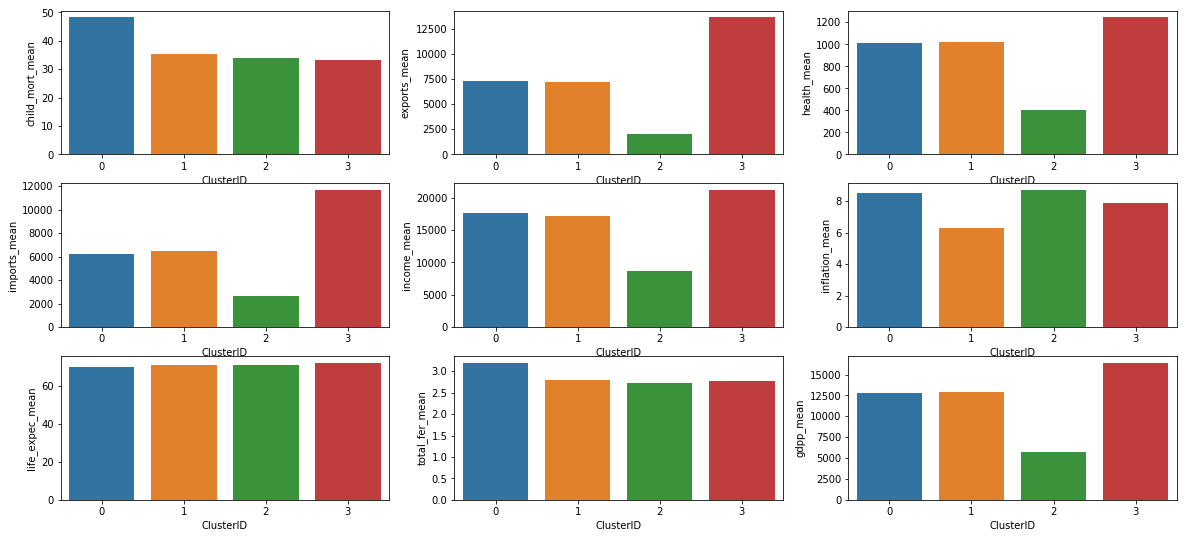

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 9))
plt.subplot(3,3,1)
sns.barplot(x=df_hc_mean.ClusterID, y=df_hc_mean.child_mort_mean)

plt.subplot(3,3,2)
sns.barplot(x=df_hc_mean.ClusterID, y=df_hc_mean.exports_mean)

plt.subplot(3,3,3)
sns.barplot(x=df_hc_mean.ClusterID, y=df_hc_mean.health_mean)

plt.subplot(3,3,4)
sns.barplot(x=df_hc_mean.ClusterID, y=df_hc_mean.imports_mean)

plt.subplot(3,3,5)
sns.barplot(x=df_hc_mean.ClusterID, y=df_hc_mean.income_mean)

plt.subplot(3,3,6)
sns.barplot(x=df_hc_mean.ClusterID, y=df_hc_mean.inflation_mean)

plt.subplot(3,3,7)
sns.barplot(x=df_hc_mean.ClusterID, y=df_hc_mean.life_expec_mean)

plt.subplot(3,3,8)
sns.barplot(x=df_hc_mean.ClusterID, y=df_hc_mean.total_fer_mean)

plt.subplot(3,3,9)
sns.barplot(x=df_hc_mean.ClusterID, y=df_hc_mean.gdpp_mean)

plt.show()

In [88]:
final=df_hc[df_hc['ClusterID'] == 2]['country'].count()
final

4

In [89]:
df_hc[df_hc['ClusterID'] == 2]['country'].head(10)

6      Armenia
13    Barbados
47       Egypt
59       Ghana
Name: country, dtype: object

So from all the above analysis we can see that ** hierarchial clustering with 5 clusters ** will give us the required list of countries which are in dire need of aid

#### Reason for choosing Hierarcial clustering:
     1. Gives us a fair amount of countries in the cluster ( not too much as in K-means or too less)
     2. It is both more flexible and has fewer hidden assumptions about the distribution of the underlying data.

#### Few points to note (Additional info) :
With k-Means clustering, you need to have a sense ahead-of-time what your desired number of clusters is (this is the 'k' value). Also, k-means will often give unintuitive results if (a) your data is not well-separated into sphere-like clusters, (b) you pick a 'k' not well-suited to the shape of your data, i.e. you pick a value too high or too low, or (c) you have weird initial values for your cluster centroids (one strategy is to run a bunch of k-means algorithms with random starting centroids and take some common clustering result as the final result).

In contrast, hierarchical clustering has fewer assumptions about the distribution of your data - the only requirement (which k-means also shares) is that a distance can be calculated each pair of data points. Hierarchical clustering typically 'joins' nearby points into a cluster, and then successively adds nearby points to the nearest group. You end up with a 'dendrogram', or a sort of connectivity plot. You can use that plot to decide after the fact of how many clusters your data has, by cutting the dendrogram at different heights. Of course, if you need to pre-decide how many clusters you want (based on some sort of business need) you can do that too. 

#### Hierarchical clustering can be more computationally expensive but usually produces more intuitive results.

###### Source: (https://datascience.stackexchange.com/questions/27501/k-means-vs-hierarchical-clustering)